### Seminar 1. Oct 11th 2019. Exploratory Data Analysis (EDA)
Bachelor's program 38.03.05 «Business Informatics»
Course «Introduction to Big Data»

Case description: a patient makes a doctor appointment and doesn't show up at the medical facility. How to decrease such empty booking slots? What is the purpose of analyzing this data and what is the business value behind it?


--------------------------------------------
### Research questions for our first insights:

1) The patients portrait: the visits frequency analysis?

2) What is the gender proportion of the dataset?

3) What is the patient age distribution for attendance feature?

4) What is the probability of attending the doctor with respect to Age?

5) What is the probability of attending the doctor with respect to AwaitingTime?

6) On which weekday the patients visit their polyclinics most frequently?

7) How likely patients come to their scheduled appointment if they have received a sms?
 
8) Which factors can help to predict the showing up of a patient?

--------------------------------------------
### Dataset description
the total number of ~300k medical appointments and its 15 variables. The target one for our research is "Status" of attendance: patient show-up or no-show the appointment

### Step 1. Importing the libraries

In [1]:
import numpy as np # the fundamental package for scientific computing with Python
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
from pprint import pprint

In [3]:
#kaggle example
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
sns.set()

### Step 2. Reading the data

In [6]:
df = pds.read_csv('healthcare_appointments.csv', sep= ';')

In [7]:
df

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,17,F,2014-03-26T14:11:55Z,2014-04-09T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,1,-14
1,21,F,2014-04-09T08:57:02Z,2014-04-17T00:00:00Z,Thursday,No-Show,0,0,0,0,0,0,0,0,-8
2,61,F,2015-10-07T07:26:45Z,2015-10-08T00:00:00Z,Thursday,Show-Up,1,0,1,0,0,1,0,0,-1
3,55,F,2015-11-13T07:19:33Z,2015-11-17T00:00:00Z,Tuesday,Show-Up,0,0,1,0,0,0,0,1,-4
4,9,F,2014-05-06T09:06:16Z,2014-06-12T00:00:00Z,Thursday,No-Show,0,0,0,1,0,0,0,1,-37
5,37,F,2015-11-13T11:56:55Z,2015-11-17T00:00:00Z,Tuesday,No-Show,0,0,0,0,0,0,0,1,-4
6,11,F,2015-05-15T14:08:18Z,2015-06-19T00:00:00Z,Friday,No-Show,0,0,0,0,0,0,0,1,-35
7,35,M,2014-02-11T08:58:05Z,2014-03-12T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,1,-29
8,36,F,2015-03-06T07:45:42Z,2015-03-12T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,1,0,1,-6
9,88,M,2014-08-01T09:32:28Z,2014-08-27T00:00:00Z,Wednesday,No-Show,0,0,0,0,0,0,0,1,-26


In [8]:
len(df[df['DayOfTheWeek'] ==  'Sunday'])

4

In [9]:
col = ['Age', 'AwaitingTime']
#df[col]

In [10]:
print(df.head())

   Age Gender AppointmentRegistration        ApointmentData DayOfTheWeek  \
0   17      F    2014-03-26T14:11:55Z  2014-04-09T00:00:00Z    Wednesday   
1   21      F    2014-04-09T08:57:02Z  2014-04-17T00:00:00Z     Thursday   
2   61      F    2015-10-07T07:26:45Z  2015-10-08T00:00:00Z     Thursday   
3   55      F    2015-11-13T07:19:33Z  2015-11-17T00:00:00Z      Tuesday   
4    9      F    2014-05-06T09:06:16Z  2014-06-12T00:00:00Z     Thursday   

    Status  Diabetes  Alcoolism  HiperTension  Handcap  Smokes  Scholarship  \
0  Show-Up         0          0             0        0       0            0   
1  No-Show         0          0             0        0       0            0   
2  Show-Up         1          0             1        0       0            1   
3  Show-Up         0          0             1        0       0            0   
4  No-Show         0          0             0        1       0            0   

   Tuberculosis  Sms_Reminder  AwaitingTime  
0             0       

In [11]:
print(df.columns)


Index(['Age', 'Gender', 'AppointmentRegistration', 'ApointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alcoolism', 'HiperTension',
       'Handcap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 15 columns):
Age                        300000 non-null int64
Gender                     300000 non-null object
AppointmentRegistration    300000 non-null object
ApointmentData             300000 non-null object
DayOfTheWeek               300000 non-null object
Status                     300000 non-null object
Diabetes                   300000 non-null int64
Alcoolism                  300000 non-null int64
HiperTension               300000 non-null int64
Handcap                    300000 non-null int64
Smokes                     300000 non-null int64
Scholarship                300000 non-null int64
Tuberculosis               300000 non-null int64
Sms_Reminder               300000 non-null int64
AwaitingTime               300000 non-null int64
dtypes: int64(10), object(5)
memory usage: 34.3+ MB


In [13]:
df

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,17,F,2014-03-26T14:11:55Z,2014-04-09T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,1,-14
1,21,F,2014-04-09T08:57:02Z,2014-04-17T00:00:00Z,Thursday,No-Show,0,0,0,0,0,0,0,0,-8
2,61,F,2015-10-07T07:26:45Z,2015-10-08T00:00:00Z,Thursday,Show-Up,1,0,1,0,0,1,0,0,-1
3,55,F,2015-11-13T07:19:33Z,2015-11-17T00:00:00Z,Tuesday,Show-Up,0,0,1,0,0,0,0,1,-4
4,9,F,2014-05-06T09:06:16Z,2014-06-12T00:00:00Z,Thursday,No-Show,0,0,0,1,0,0,0,1,-37
5,37,F,2015-11-13T11:56:55Z,2015-11-17T00:00:00Z,Tuesday,No-Show,0,0,0,0,0,0,0,1,-4
6,11,F,2015-05-15T14:08:18Z,2015-06-19T00:00:00Z,Friday,No-Show,0,0,0,0,0,0,0,1,-35
7,35,M,2014-02-11T08:58:05Z,2014-03-12T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,1,-29
8,36,F,2015-03-06T07:45:42Z,2015-03-12T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,1,0,1,-6
9,88,M,2014-08-01T09:32:28Z,2014-08-27T00:00:00Z,Wednesday,No-Show,0,0,0,0,0,0,0,1,-26


In [14]:
df.rename(columns = {'ApointmentData':'AppointmentData',
                         'Alcoolism': 'Alchoholism',
                         'HiperTension': 'Hypertension',
                         'Handcap': 'Handicap'}, inplace = True)

print(df.columns)
print(df.shape)

Index(['Age', 'Gender', 'AppointmentRegistration', 'AppointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alchoholism', 'Hypertension',
       'Handicap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')
(300000, 15)


### Step 3. Cleaning & preparing the data
As it can be seen from the previous analysis step, `ScheduledDay` and `AppointmentDay` features have an `object` data type
To make dealing with date features easies, let’s convert the type of ‘ScheduledDay’ and ‘AppointmentDay’ to datetime64[ns]  for convinience of future work.

In [15]:
#converting the initial object format to datetime64[ns]
df.AppointmentRegistration = df.AppointmentRegistration.apply(np.datetime64)
df.AppointmentData = df.AppointmentData.apply(np.datetime64)
df.AwaitingTime = df.AwaitingTime.apply(abs)

In [16]:
print(df.AppointmentRegistration.head())
print(df.AppointmentData.head())
print(df.AwaitingTime.head())

0   2014-03-26 14:11:55
1   2014-04-09 08:57:02
2   2015-10-07 07:26:45
3   2015-11-13 07:19:33
4   2014-05-06 09:06:16
Name: AppointmentRegistration, dtype: datetime64[ns]
0   2014-04-09
1   2014-04-17
2   2015-10-08
3   2015-11-17
4   2014-06-12
Name: AppointmentData, dtype: datetime64[ns]
0    14
1     8
2     1
3     4
4    37
Name: AwaitingTime, dtype: int64


In [17]:
df

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,17,F,2014-03-26 14:11:55,2014-04-09,Wednesday,Show-Up,0,0,0,0,0,0,0,1,14
1,21,F,2014-04-09 08:57:02,2014-04-17,Thursday,No-Show,0,0,0,0,0,0,0,0,8
2,61,F,2015-10-07 07:26:45,2015-10-08,Thursday,Show-Up,1,0,1,0,0,1,0,0,1
3,55,F,2015-11-13 07:19:33,2015-11-17,Tuesday,Show-Up,0,0,1,0,0,0,0,1,4
4,9,F,2014-05-06 09:06:16,2014-06-12,Thursday,No-Show,0,0,0,1,0,0,0,1,37
5,37,F,2015-11-13 11:56:55,2015-11-17,Tuesday,No-Show,0,0,0,0,0,0,0,1,4
6,11,F,2015-05-15 14:08:18,2015-06-19,Friday,No-Show,0,0,0,0,0,0,0,1,35
7,35,M,2014-02-11 08:58:05,2014-03-12,Wednesday,Show-Up,0,0,0,0,0,0,0,1,29
8,36,F,2015-03-06 07:45:42,2015-03-12,Thursday,Show-Up,0,0,0,0,0,1,0,1,6
9,88,M,2014-08-01 09:32:28,2014-08-27,Wednesday,No-Show,0,0,0,0,0,0,0,1,26


### Step 4. Exploring the healthcare data: checking for errors and NaNs



In [18]:
print('Age:',sorted(df.Age.unique()))
print('Gender:',df.Gender.unique())
print('DayOfTheWeek:',df.DayOfTheWeek.unique())
print('Status:',df.Status.unique())
print('Diabetes:',df.Diabetes.unique())
print('Alchoholism:',df.Alchoholism.unique())
print('Hypertension:',df.Hypertension.unique())
print('Handicap:',df.Handicap.unique())
print('Smokes:',df.Smokes.unique())
print('Scholarship:',df.Scholarship.unique())
print('Tuberculosis:',df.Tuberculosis.unique())
print('Sms_Reminder:',df.Sms_Reminder.unique())
print('AwaitingTime:',sorted(df.AwaitingTime.unique()))

Age: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 107, 108, 114]
Gender: ['F' 'M']
DayOfTheWeek: ['Wednesday' 'Thursday' 'Tuesday' 'Friday' 'Monday' 'Saturday' 'Sunday']
Status: ['Show-Up' 'No-Show']
Diabetes: [0 1]
Alchoholism: [0 1]
Hypertension: [0 1]
Handicap: [0 1 2 3 4]
Smokes: [0 1]
Scholarship: [0 1]
Tuberculosis: [0 1]
Sms_Reminder: [1 0 2]
AwaitingTime: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,

In [19]:
df.describe()

,Age,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000
mean,37.781003,0.076963,0.024827,0.215577,0.020880,0.051987,0.097863,0.000467,0.576597,13.85753
std,22.795439,0.266534,0.155597,0.411222,0.157726,0.222000,0.297130,0.021597,0.499213,15.69848
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.00000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.00000
max,114.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,351.00000


there are some ourliers in the dataset, such as impossible ages -2 and -1, and some ages such as 100 and beyond. Therefore, we can establish the limitation of the analysis period, choosing the Age that suits our goals of the research

In [20]:
df= df[(df.Age>=0)&(df.Age<=97)]


In [21]:
df.describe()

,Age,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
count,299921.000000,299921.000000,299921.000000,299921.000000,299921.000000,299921.000000,299921.000000,299921.000000,299921.000000,299921.000000
mean,37.765845,0.076950,0.024833,0.215510,0.020829,0.051980,0.097889,0.000467,0.576682,13.858326
std,22.776333,0.266513,0.155617,0.411176,0.157510,0.221988,0.297165,0.021600,0.499201,15.697884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000
max,97.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,351.000000


In [22]:
print("Attendance analysis of Patients\n")
print(df.groupby(['Status']).size())

Attendance analysis of Patients

Status
No-Show     90668
Show-Up    209253
dtype: int64


In [23]:
print("\nAttendance analysis of Patients in percent %\n")
show = df.groupby(['Status']).size()[0]/(df.groupby(['Status']).size()[0]+df.groupby(['Status']).size()[1])
print("Percent of Patients who `Showed Up` => {:.2f}%".format(show*100))


noshow = df.groupby(['Status']).size()[1]/(df.groupby(['Status']).size()[0]+df.groupby(['Status']).size()[1])
print("Percent of Patients who Did `Not Showed Up` => {:.2f}%".format(noshow*100))


Attendance analysis of Patients in percent %

Percent of Patients who `Showed Up` => 30.23%
Percent of Patients who Did `Not Showed Up` => 69.77%


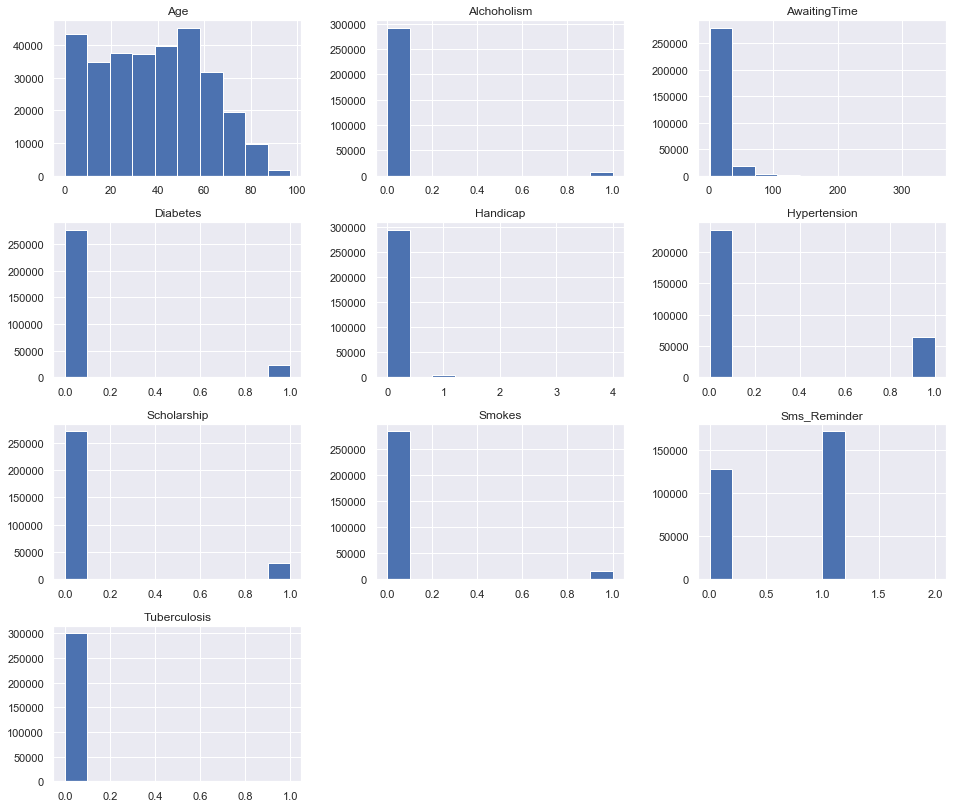

In [24]:
df.hist(figsize=(16,14));


##### Please, provide histogram observations below:

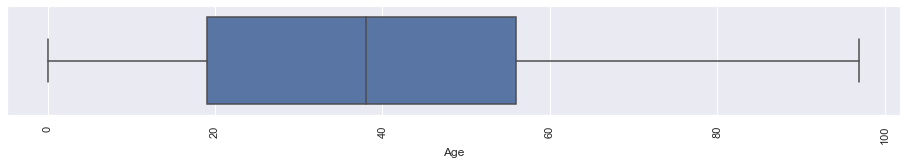

In [25]:
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
_ = sns.boxplot(x=df.Age)

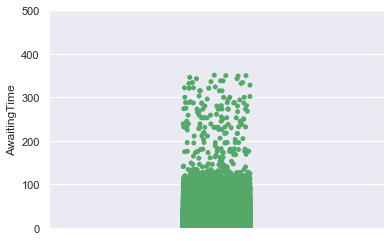

In [26]:
sns.stripplot(data = df, y = 'AwaitingTime',jitter  = True, color="g")
plt.ylim(0, 500)
plt.show()

In [27]:
def probStatus(dataset, group_by):
    df = pds.crosstab(index = dataset[group_by], columns = dataset.Status).reset_index()
    df['probShowUp'] = df['Show-Up'] / (df['Show-Up'] + df['No-Show'])
    return df[[group_by, 'probShowUp']]

In [28]:
import matplotlib.pyplot as plt

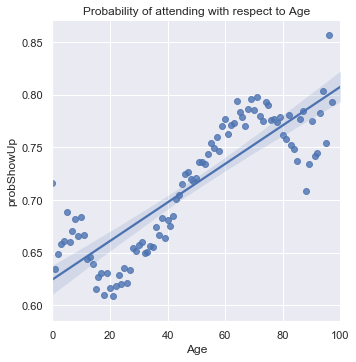

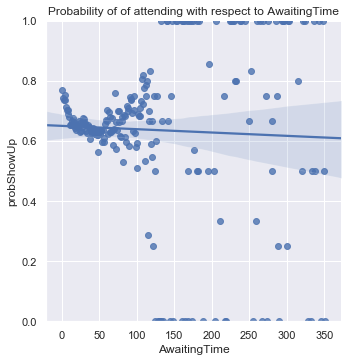

In [29]:
#graph1 - Age
sns.lmplot(data = probStatus(df, 'Age'), x = 'Age', y = 'probShowUp', fit_reg = True)
plt.xlim(0, 100)
plt.title('Probability of attending with respect to Age')
plt.show()

#graph2 - AwaitingTime
sns.lmplot(data = probStatus(df, 'AwaitingTime'), x = 'AwaitingTime', 
           y = 'probShowUp', fit_reg = True)
plt.title('Probability of of attending with respect to AwaitingTime')
plt.ylim(0, 1)
plt.show()

In [30]:
df.head(100)

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,17,F,2014-03-26 14:11:55,2014-04-09,Wednesday,Show-Up,0,0,0,0,0,0,0,1,14
1,21,F,2014-04-09 08:57:02,2014-04-17,Thursday,No-Show,0,0,0,0,0,0,0,0,8
2,61,F,2015-10-07 07:26:45,2015-10-08,Thursday,Show-Up,1,0,1,0,0,1,0,0,1
3,55,F,2015-11-13 07:19:33,2015-11-17,Tuesday,Show-Up,0,0,1,0,0,0,0,1,4
4,9,F,2014-05-06 09:06:16,2014-06-12,Thursday,No-Show,0,0,0,1,0,0,0,1,37
5,37,F,2015-11-13 11:56:55,2015-11-17,Tuesday,No-Show,0,0,0,0,0,0,0,1,4
6,11,F,2015-05-15 14:08:18,2015-06-19,Friday,No-Show,0,0,0,0,0,0,0,1,35
7,35,M,2014-02-11 08:58:05,2014-03-12,Wednesday,Show-Up,0,0,0,0,0,0,0,1,29
8,36,F,2015-03-06 07:45:42,2015-03-12,Thursday,Show-Up,0,0,0,0,0,1,0,1,6
9,88,M,2014-08-01 09:32:28,2014-08-27,Wednesday,No-Show,0,0,0,0,0,0,0,1,26


#### Task 1. Who visits the doctor more often? 

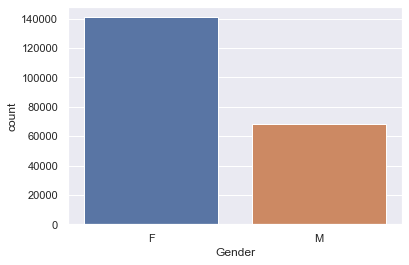

In [31]:
visits = df[df['Status'] == 'Show-Up']
sns.countplot(x='Gender', data=visits)

##### 1.1. Provide normalized values of male vs female distribution in % 
Put your code in the cell below:

In [32]:
df_man= df[(df.Gender=='M')] 
df_women= df[(df.Gender=='F')] 
percent_men = len(df_man)/len(df)
percent_women =  len(df_women)/len(df)
print(percent_men, percent_women )

0.3300202386628479 0.6699797613371521


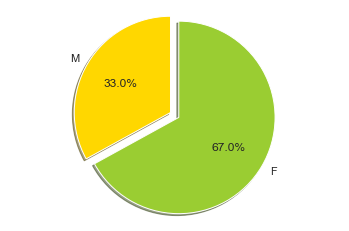

In [33]:
labels = 'M', 'F'
#visits = (df[df['Status'] == 'Show-Up'])
sizes = [len(df_man), len(df_women)]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

##### 1.2. Provide the line graph (or alternative vizualitation) on Age distribution of the dataset
Put your code in the cell below:

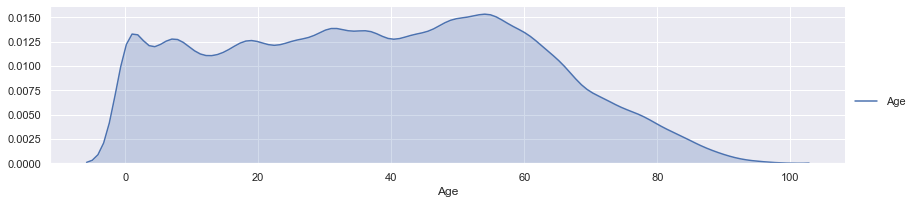

In [34]:
fig = sns.FacetGrid(df, aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
fig.add_legend()

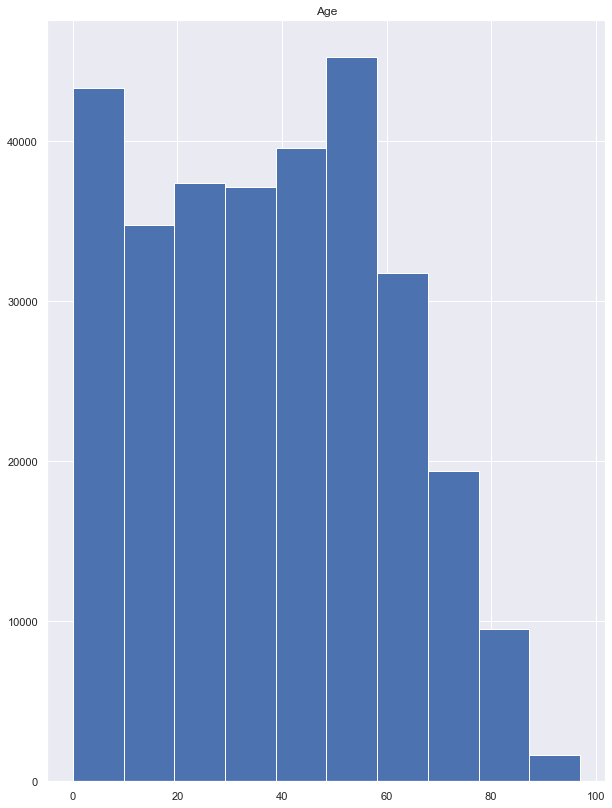

In [35]:
df.hist(column=['Age'], figsize=(10,14));

##### 1.3. Here is the example for multidimensional vizualization on Age feature

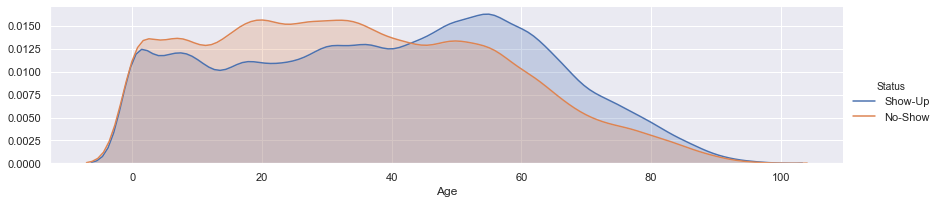

In [36]:
# age distribution for show & no show
fig = sns.FacetGrid(df, hue='Status', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
fig.add_legend()

#### Task 2. How likely patients come to their scheduled appointment if they have received a sms
Put your code in the cell below (hint- you may use catplot):

In [37]:
#df= df[(df.Age>=0)&(df.Age<=97)]
df = df[df['Sms_Reminder'] <2]

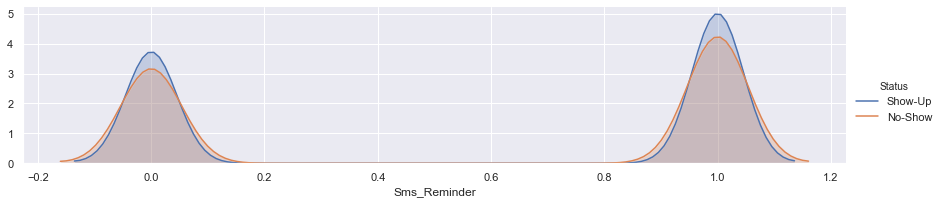

In [38]:
# age distribution for show & no show
fig = sns.FacetGrid(df, hue='Status', aspect=4)
fig.map(sns.kdeplot, 'Sms_Reminder', shade=True)
fig.add_legend()

In [39]:
df

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,17,F,2014-03-26 14:11:55,2014-04-09,Wednesday,Show-Up,0,0,0,0,0,0,0,1,14
1,21,F,2014-04-09 08:57:02,2014-04-17,Thursday,No-Show,0,0,0,0,0,0,0,0,8
2,61,F,2015-10-07 07:26:45,2015-10-08,Thursday,Show-Up,1,0,1,0,0,1,0,0,1
3,55,F,2015-11-13 07:19:33,2015-11-17,Tuesday,Show-Up,0,0,1,0,0,0,0,1,4
4,9,F,2014-05-06 09:06:16,2014-06-12,Thursday,No-Show,0,0,0,1,0,0,0,1,37
5,37,F,2015-11-13 11:56:55,2015-11-17,Tuesday,No-Show,0,0,0,0,0,0,0,1,4
6,11,F,2015-05-15 14:08:18,2015-06-19,Friday,No-Show,0,0,0,0,0,0,0,1,35
7,35,M,2014-02-11 08:58:05,2014-03-12,Wednesday,Show-Up,0,0,0,0,0,0,0,1,29
8,36,F,2015-03-06 07:45:42,2015-03-12,Thursday,Show-Up,0,0,0,0,0,1,0,1,6
9,88,M,2014-08-01 09:32:28,2014-08-27,Wednesday,No-Show,0,0,0,0,0,0,0,1,26


#### Task 3. Which factors can help to predict the showing up of a patient?
Put your code in the cell below:

In [40]:
df['DaysBeforeReg'] =   (df['AppointmentData'] - df['AppointmentRegistration'])
df['DaysBeforeReg'] = df['DaysBeforeReg'].apply(lambda x: x.days)
df

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alchoholism,Hypertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,DaysBeforeReg
0,17,F,2014-03-26 14:11:55,2014-04-09,Wednesday,Show-Up,0,0,0,0,0,0,0,1,14,13
1,21,F,2014-04-09 08:57:02,2014-04-17,Thursday,No-Show,0,0,0,0,0,0,0,0,8,7
2,61,F,2015-10-07 07:26:45,2015-10-08,Thursday,Show-Up,1,0,1,0,0,1,0,0,1,0
3,55,F,2015-11-13 07:19:33,2015-11-17,Tuesday,Show-Up,0,0,1,0,0,0,0,1,4,3
4,9,F,2014-05-06 09:06:16,2014-06-12,Thursday,No-Show,0,0,0,1,0,0,0,1,37,36
5,37,F,2015-11-13 11:56:55,2015-11-17,Tuesday,No-Show,0,0,0,0,0,0,0,1,4,3
6,11,F,2015-05-15 14:08:18,2015-06-19,Friday,No-Show,0,0,0,0,0,0,0,1,35,34
7,35,M,2014-02-11 08:58:05,2014-03-12,Wednesday,Show-Up,0,0,0,0,0,0,0,1,29,28
8,36,F,2015-03-06 07:45:42,2015-03-12,Thursday,Show-Up,0,0,0,0,0,1,0,1,6,5
9,88,M,2014-08-01 09:32:28,2014-08-27,Wednesday,No-Show,0,0,0,0,0,0,0,1,26,25


(294317, 16)

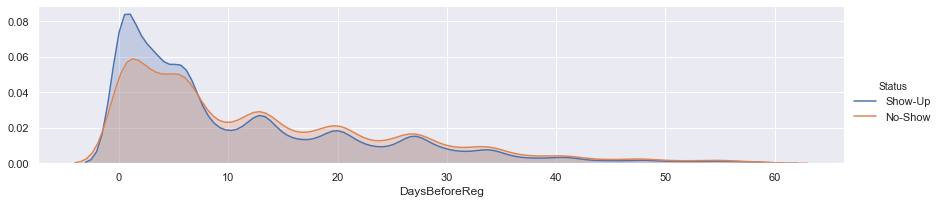

In [41]:
df2 = df[df['DaysBeforeReg'] < 60]
fig = sns.FacetGrid(df2, hue='Status', aspect=4)
fig.map(sns.kdeplot, 'DaysBeforeReg', shade=True)
fig.add_legend()


df2.shape

In [42]:
week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [43]:
#plt.figure(figsize=(16,4))
#ax = sns.countplot(x=df.DayOfTheWeek, order=week_key)
#ax.set_title("Appointment Count for Appointment Day of Week")
#plt.show()

In [44]:

df['HourOfReg'] = df['AppointmentRegistration'].apply(lambda x: x.hour)
#df[df['Status'] == 'Show-Up'] = 1
#df[df['Status'] == 'No-Show'] = 0

#sns.lmplot(data = df, x = 'HourOfReg', y = 'Status', fit_reg = True)
#plt.xlim(0, 100)
#plt.title('Probability of attending with respect to Age')
#plt.show()


In [45]:
df.drop(['AppointmentRegistration', 'AppointmentData'], inplace = True, axis = 1)

In [53]:
df['Status'].replace('No-Show', 0, inplace = True)
df['Status'].replace('Show-Up', 1, inplace = True)
y = df['Status']
X = df.drop(['Status'], axis = 1)


In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
X_enc = pd.get_dummies(X)

In [56]:
X_train, X_test, y_train,y_test = train_test_split(X_enc, y, test_size = 0.4, random_state = 42)

In [66]:
logreg = LogisticRegression(penalty='l2', max_iter = 10000, C = )
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = logreg.score(X_train, y_train)* 100
acc_log

69.72171926794618

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
grad_b = GradientBoostingClassifier(max_depth=5, n_estimators = 1000, random_state = 42, max_features='sqrt')
grad_b.fit(X_train, y_train)
y_pred = grad_b.predict(X_test)
acc_grad = grad_b.score(X_train, y_train)* 100
acc_grad

71.42594501239589

In [75]:
grad_b = GradientBoostingClassifier(max_depth=5, n_estimators = 250, random_state = 42, max_features='sqrt')
grad_b.fit(X_train, y_train)
y_pred = grad_b.predict(X_test)
acc_grad = grad_b.score(X_train, y_train)* 100
acc_grad

70.22312599236747